# 📺 Netflix Dataset Analysis

This notebook explores and visualizes the Netflix Titles dataset. The goal is to identify trends in content type, production countries, release years, and more.

**Dataset:** `netflix_titles.csv`  
**Author:** Shreya  
**Source:** [Netflix Dataset on Kaggle](https://www.kaggle.com/datasets/shivamb/netflix-shows)

---


In [5]:
import pandas as pd

df = pd.read_csv(r"C:\Users\Mariam Shariff\OneDrive\Documents\PythonData\NetflixData\netflix_titles.csv")
print(df.head())


  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [9]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

## 📊 Distribution of Movies and TV Shows

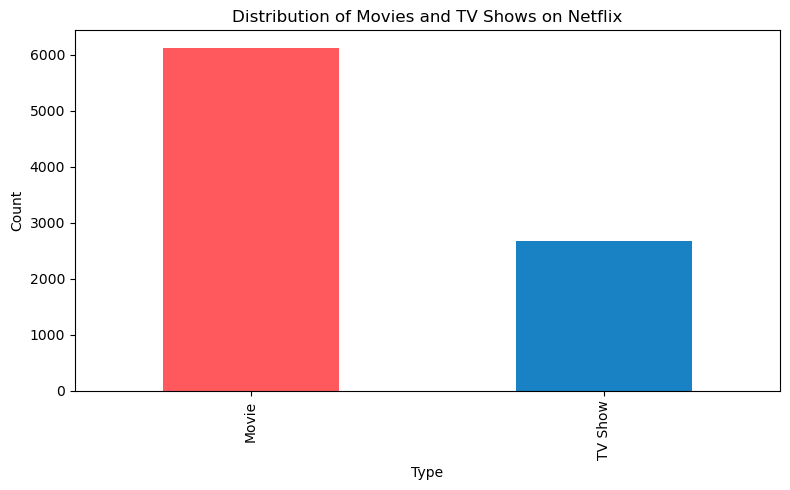

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
df['type'].value_counts().plot(kind='bar', color=['#FF595E', '#1982C4'])
plt.title('Distribution of Movies and TV Shows on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## 📈 Content Added Over the Years

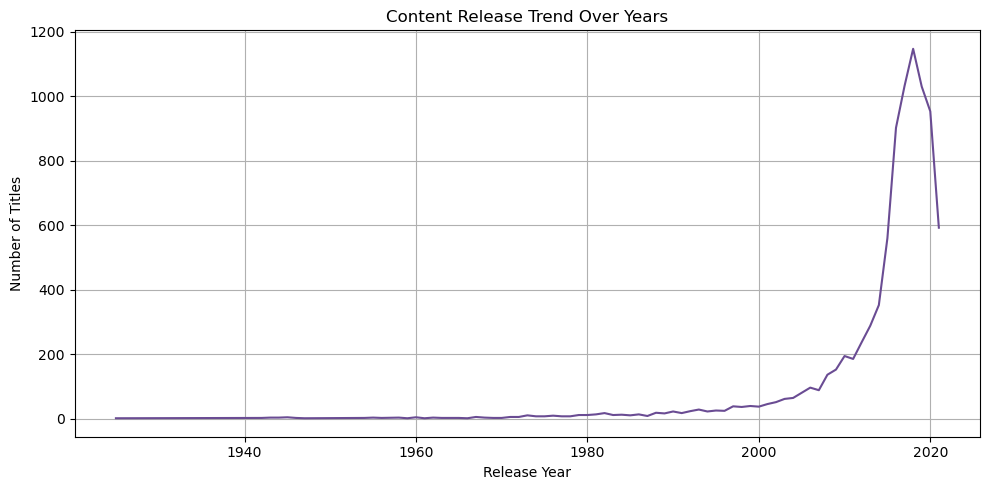

In [13]:
plt.figure(figsize=(10,5))
df['release_year'].value_counts().sort_index().plot(kind='line', color='#6A4C93')
plt.title('Content Release Trend Over Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.tight_layout()
plt.show()

## 🔢 Most Common Content Ratings

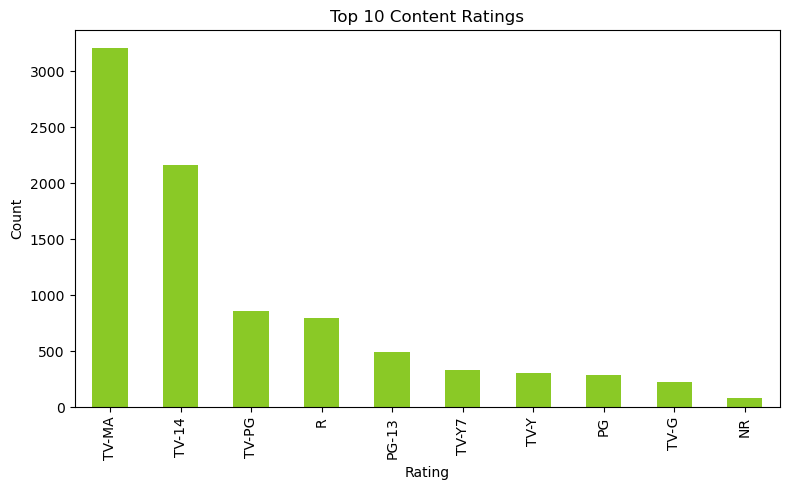

In [15]:
plt.figure(figsize=(8,5))
df['rating'].value_counts().head(10).plot(kind='bar', color='#8AC926')
plt.title('Top 10 Content Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## 🌍 Top Countries by Content Count

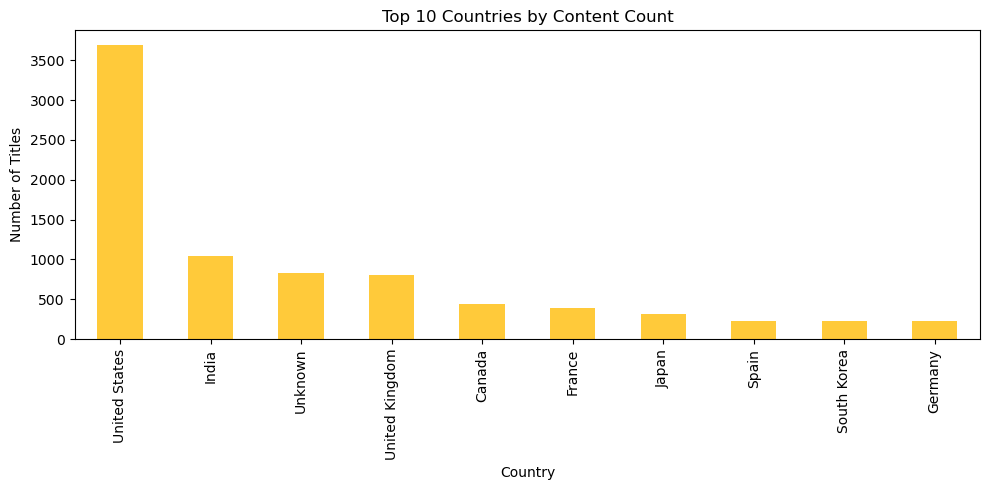

In [17]:
df['country'] = df['country'].fillna('Unknown')
top_countries = df['country'].str.split(',').explode().str.strip().value_counts().head(10)

plt.figure(figsize=(10,5))
top_countries.plot(kind='bar', color='#FFCA3A')
plt.title('Top 10 Countries by Content Count')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.tight_layout()
plt.show()

In [21]:
print(df.shape)

(8807, 14)


In [23]:
print(df.isnull().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          4
duration        3
listed_in       0
description     0
year_added      0
month_added     0
dtype: int64


In [27]:
print(df['type'].value_counts())

type
Movie      6131
TV Show    2676
Name: count, dtype: int64


In [29]:
print(df.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added'],
      dtype='object')


In [31]:
df.describe()

,date_added,release_year,year_added,month_added
count,8807,8807.000000,8807.000000,8807.000000
mean,2019-05-20 00:26:29.281253376,2014.180198,2018.879982,6.649370
min,2008-01-01 00:00:00,1925.000000,2008.000000,1.000000
25%,2018-04-14 12:00:00,2013.000000,2018.000000,4.000000
50%,2019-07-09 00:00:00,2017.000000,2019.000000,7.000000
75%,2020-08-19 00:00:00,2019.000000,2020.000000,10.000000
max,2021-09-25 00:00:00,2021.000000,2021.000000,12.000000
std,NaN,8.819312,1.566388,3.431813


In [33]:
df[df['type'] == 'Movie']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,9
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,9
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021,9
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,2016,3
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019,11
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019,11
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020,1


In [35]:
df.sort_values('release_year', ascending=False)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
693,s694,Movie,Ali & Ratu Ratu Queens,Lucky Kuswandi,"Iqbaal Ramadhan, Nirina Zubir, Asri Welas, Tik...",Unknown,2021-06-17,2021,TV-14,101 min,"Comedies, Dramas, International Movies","After his father's passing, a teenager sets ou...",2021,6
781,s782,Movie,Black Holes | The Edge of All We Know,Peter Galison,Unknown,Unknown,2021-06-02,2021,TV-14,99 min,Documentaries,Follow scientists on their quest to understand...,2021,6
762,s763,Movie,Sweet & Sour,Lee Kae-byeok,"Jang Ki-yong, Chae Soo-bin, Jung Soo-jung",South Korea,2021-06-04,2021,TV-14,103 min,"Comedies, International Movies, Romantic Movies",Faced with real-world opportunities and challe...,2021,6
763,s764,TV Show,Sweet Tooth,Unknown,"Nonso Anozie, Christian Convery, Adeel Akhtar,...",United States,2021-06-04,2021,TV-14,1 Season,"TV Action & Adventure, TV Dramas, TV Sci-Fi & ...",On a perilous adventure across a post-apocalyp...,2021,6
764,s765,Movie,Trippin' with the Kandasamys,Jayan Moodley,"Jailoshini Naidoo, Maeshni Naicker, Madhushan ...",South Africa,2021-06-04,2021,TV-14,94 min,"Comedies, International Movies, Romantic Movies","To rekindle their marriages, best friends-turn...",2021,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8660,s8661,Movie,Undercover: How to Operate Behind Enemy Lines,John Ford,Unknown,United States,2017-03-31,1943,TV-PG,61 min,"Classic Movies, Documentaries",This World War II-era training film dramatizes...,2017,3
8763,s8764,Movie,WWII: Report from the Aleutians,John Huston,Unknown,United States,2017-03-31,1943,TV-PG,45 min,Documentaries,Filmmaker John Huston narrates this Oscar-nomi...,2017,3
8205,s8206,Movie,The Battle of Midway,John Ford,"Henry Fonda, Jane Darwell",United States,2017-03-31,1942,TV-14,18 min,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...,2017,3
7790,s7791,Movie,Prelude to War,Frank Capra,Unknown,United States,2017-03-31,1942,TV-14,52 min,"Classic Movies, Documentaries",Frank Capra's documentary chronicles the rise ...,2017,3


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8807 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  year_added    8807 non-null   int32         
 13  month_added   8807 non-null   int32         
dtypes: datetime64[ns](1), int32(2), int64(1), object(10)
memory usage: 894.6+ KB


In [39]:
# Show number of missing values in each column
print(df.isnull().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          4
duration        3
listed_in       0
description     0
year_added      0
month_added     0
dtype: int64


In [47]:
if df['date_added'].dtype == 'object':
    df['date_added'] = df['date_added'].str.strip()
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

  date_added  year_added month_added
0 2021-09-25        2021   September
1 2021-09-24        2021   September
2 2021-09-24        2021   September
3 2021-09-24        2021   September
4 2021-09-24        2021   September
year_added
2008       2
2009       2
2010       1
2011      13
2012       3
2013      10
2014      23
2015      73
2016     427
2017    1189
2018    1643
2019    2032
2020    1890
2021    1499
Name: count, dtype: int64


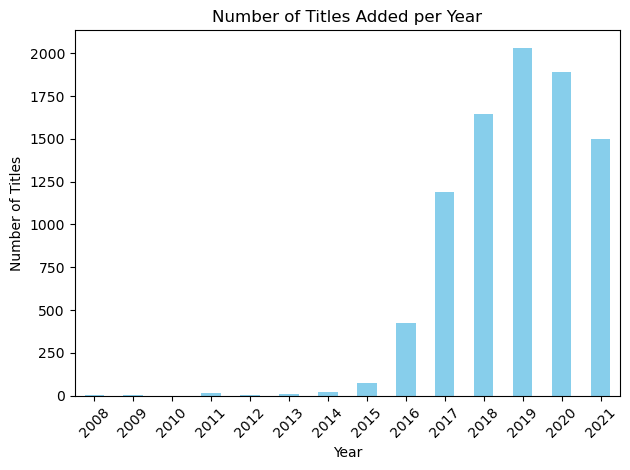

In [49]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month_name()
print(df[['date_added', 'year_added', 'month_added']].head())
yearly_additions = df['year_added'].value_counts().sort_index()
print(yearly_additions)
import matplotlib.pyplot as plt

yearly_additions.plot(kind='bar', color='skyblue')
plt.title('Number of Titles Added per Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

year_added  2008  2009  2010  2011  2012  2013  2014  2015  2016  2017  2018  \
type                                                                           
Movie          1     2     1    13     3     6    19    56   253   839  1237   
TV Show        1     0     0     0     0     4     4    17   174   350   406   

year_added  2019  2020  2021  
type                          
Movie       1424  1284   993  
TV Show      608   606   506  


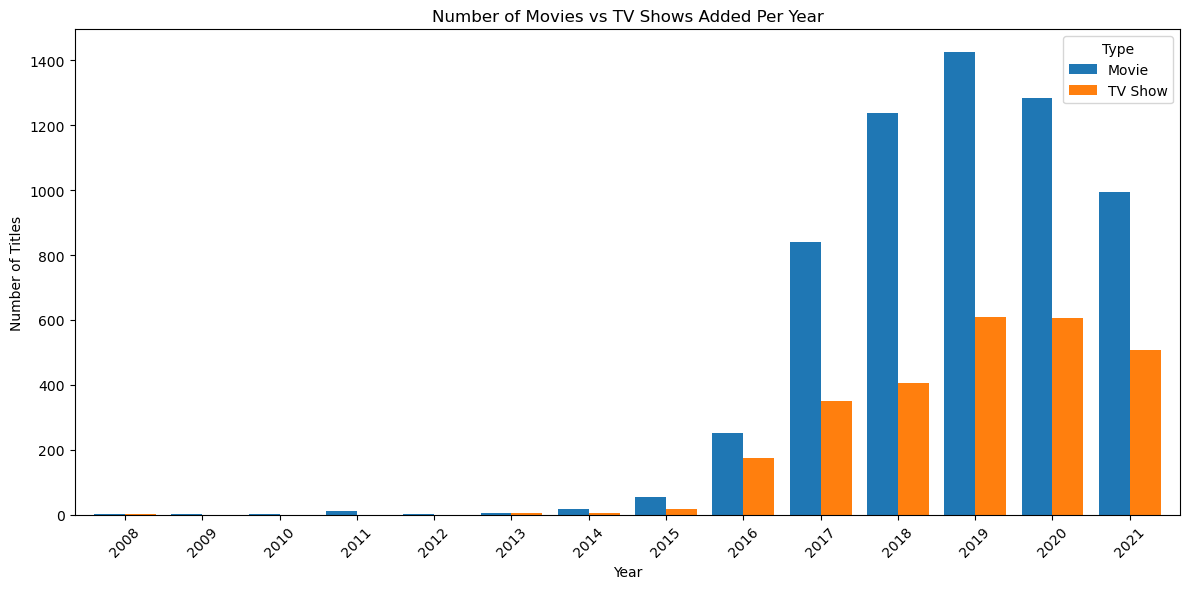

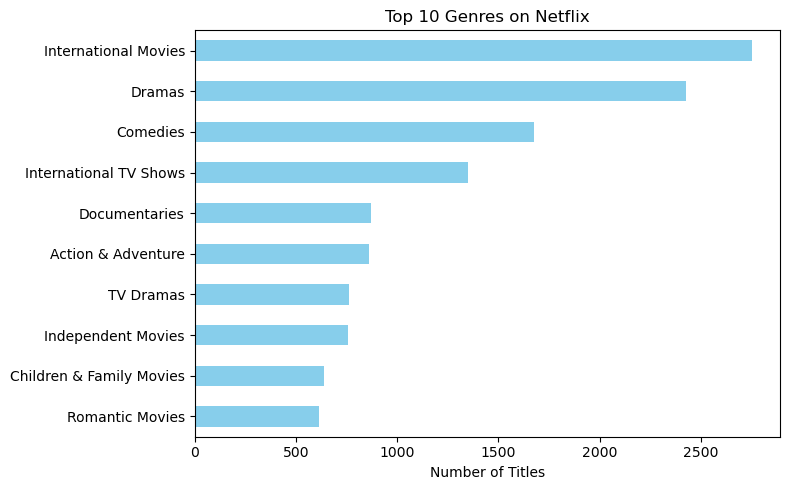

In [51]:
# Extract year from date_added
df['year_added'] = df['date_added'].dt.year

# Drop missing years (if any)
df = df.dropna(subset=['year_added'])

# Group by type and year
type_year_group = df.groupby(['type', 'year_added']).size().unstack(fill_value=0)

# Display the grouped data (optional)
print(type_year_group)

import matplotlib.pyplot as plt

# Transpose to make 'year' on X-axis
type_year_group.T.plot(kind='bar', figsize=(12, 6), width=0.8)

plt.title('Number of Movies vs TV Shows Added Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.tight_layout()
plt.show()

# Top genres count
top_genres = df['listed_in'].str.split(', ', expand=True).stack().value_counts().head(10)

# Plot
top_genres.plot(kind='barh', figsize=(8, 5), color='skyblue')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.gca().invert_yaxis()  # Most popular at top
plt.tight_layout()
plt.show()


In [55]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\Mariam Shariff\OneDrive\Documents\PythonData\NetflixData\netflix_titles.csv")

# Step 1: Initial missing values check
print("Missing values before cleaning:")
print(df.isnull().sum())

# Step 2: Fill missing values with explicit reassignment (safe from warnings)
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')

# Step 3: Clean and format date
df['date_added'] = pd.to_datetime(df['date_added'].astype(str).str.strip(), errors='coerce')
df['date_added'] = df['date_added'].ffill()

# Step 4: Strip whitespace from text fields
df['title'] = df['title'].str.strip()
df['director'] = df['director'].str.strip()
df['cast'] = df['cast'].str.strip()
df['country'] = df['country'].str.strip()

# Step 5: Remove duplicates and reset index
df = df.drop_duplicates().reset_index(drop=True)

# Step 6: Extract year and month
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# Final check
print("\nMissing values after cleaning:")
print(df.isnull().sum())
print("\nCleaned DataFrame:")
print(df.head())


Missing values before cleaning:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Missing values after cleaning:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          4
duration        3
listed_in       0
description     0
year_added      0
month_added     0
dtype: int64

Cleaned DataFrame:
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water          Unknown   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans          Unknown   
4      s5  TV Show           Kota Factory          Unknown   

             